# 1. Operaciones avanzadas en pandas: merge, concat y groupby

Este documento explica tres funciones fundamentales de pandas para el análisis y manipulación de datos: **merge**, **concat** y **groupby**.

In [1]:
import pandas as pd

## Merge

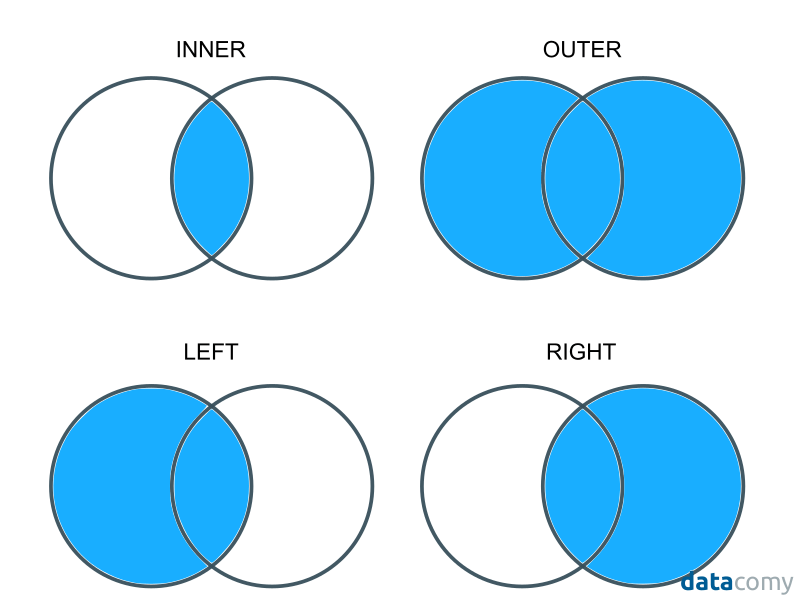

La función `merge` permite combinar dos DataFrames en base a una o más columnas clave. Es útil para unir información de diferentes fuentes.

**Sintaxis básica:**
```python
## Una Columna Clave
pd.merge(df1, df2, on='columna_clave', how='inner')

## Dos o Más
pd.merge(df1, df2, on=['columna1', 'columna2'], how='inner')
```

- `on`: columna(s) por las que se realiza la unión.
- `how`: tipo de unión (`inner`, `outer`, `left`, `right`).

**Sintaxis Avanzada**

```python
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)
```

[Link Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)

### **Ejemplo:**

Supongamos que tienes dos DataFrames con información de estudiantes y sus notas:

In [2]:
# DataFrames para ejemplos de merge
estudiantes = pd.DataFrame({
    'id': [1, 2, 3],
    'nombre': ['Ana', 'Luis', 'Sofía']
})
estudiantes

,id,nombre
0,1,Ana
1,2,Luis
2,3,Sofía


In [3]:
notas = pd.DataFrame({
    'id': [1, 2, 4],
    'nota': [6.5, 5.8, 7.0]
})
notas

,id,nota
0,1,6.5
1,2,5.8
2,4,7.0


### Inner

In [4]:
# Inner
resultado_inner = pd.merge(estudiantes, notas, on='id', how='inner')
print('Inner merge:')
resultado_inner

Inner merge:


,id,nombre,nota
0,1,Ana,6.5
1,2,Luis,5.8


### Outer

In [5]:
# Outer
resultado_outer = pd.merge(estudiantes, notas, on='id', how='outer')
print('Outer merge:')
resultado_outer

Outer merge:


,id,nombre,nota
0,1,Ana,6.5
1,2,Luis,5.8
2,3,Sofía,NaN
3,4,NaN,7.0


### Left

In [6]:
# Left
resultado_left = pd.merge(estudiantes, notas, on='id', how='left')
print('Left merge:')
resultado_left

Left merge:


,id,nombre,nota
0,1,Ana,6.5
1,2,Luis,5.8
2,3,Sofía,NaN


### Right

In [7]:
# Right
resultado_right = pd.merge(estudiantes, notas, on='id', how='right')
print('Right merge:')
resultado_right

Right merge:


,id,nombre,nota
0,1,Ana,6.5
1,2,Luis,5.8
2,4,NaN,7.0


### Merge con varias columnas clave

In [8]:
# DataFrames para merge con varias columnas (df1 y df2)
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'curso': ['A', 'B', 'A'],
    'nota': [6.5, 5.8, 7.0]
})

df1

,id,curso,nota
0,1,A,6.5
1,2,B,5.8
2,3,A,7.0


In [9]:
df2 = pd.DataFrame({
    'id': [1, 2, 3],
    'curso': ['A', 'B', 'B'],
    'asistencia': [90, 85, 88]
})

df2

,id,curso,asistencia
0,1,A,90
1,2,B,85
2,3,B,88


In [10]:
# Merge con varias columnas clave
resultado_multi = pd.merge(df1, df2, on=['id', 'curso'], how='inner')
print('Merge con varias columnas:')
resultado_multi

Merge con varias columnas:


,id,curso,nota,asistencia
0,1,A,6.5,90
1,2,B,5.8,85


### Merge usando `left_on` y `right_on`

In [11]:
# DataFrames usando left_on y right_on
alumnos = pd.DataFrame({
    'id_alumno': [1, 2, 3],
    'nombre': ['Ana', 'Luis', 'Sofía']
})
alumnos

,id_alumno,nombre
0,1,Ana
1,2,Luis
2,3,Sofía


In [12]:
calificaciones = pd.DataFrame({
    'id_estudiante': [1, 2, 4],
    'nota': [6.5, 5.8, 7.0]
})
calificaciones

,id_estudiante,nota
0,1,6.5
1,2,5.8
2,4,7.0


In [13]:
# Merge usando left_on y right_on
resultado_lr = pd.merge(alumnos, calificaciones, left_on='id_alumno', right_on='id_estudiante', how='inner')
print('Merge usando left_on y right_on:')
resultado_lr

Merge usando left_on y right_on:


,id_alumno,nombre,id_estudiante,nota
0,1,Ana,1,6.5
1,2,Luis,2,5.8


## Concat

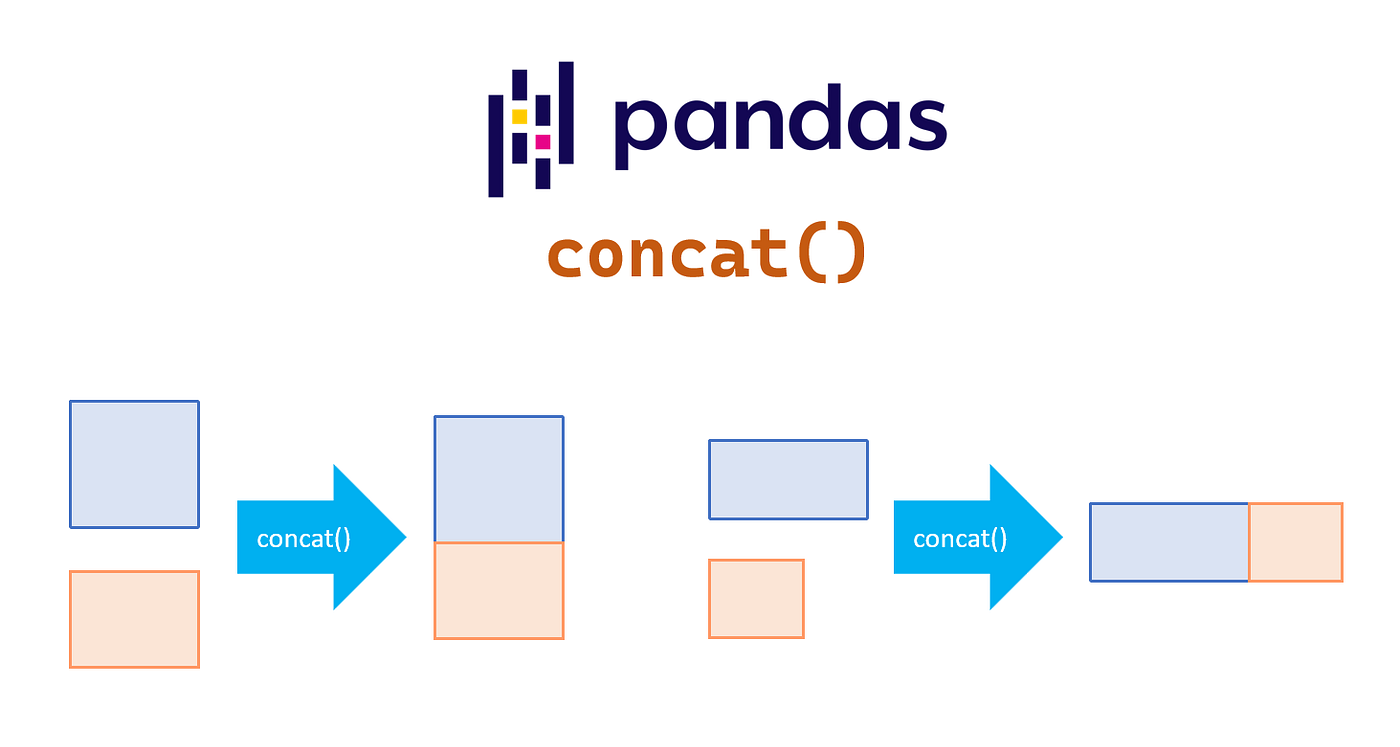

La función `concat` permite unir DataFrames o Series de manera vertical (por filas) u horizontal (por columnas). Es útil para apilar datos o agregar nuevas variables.

**Sintaxis básica:**
```python
pd.concat([df1, df2], axis=0)  # Por filas
pd.concat([df1, df2], axis=1)  # Por columnas
# El default es por filas (`axis=0`)
```
- `axis=0`: concatena por filas.
- `axis=1`: concatena por columnas.


Si no se especifica el parámetro `axis`, la función `concat` une los DataFrames por filas. Es decir, agrega los registros uno debajo del otro.

Por ejemplo:
```python
pd.concat([df1, df2])
# Equivalente a pd.concat([df1, df2], axis=0)
```

**Sintaxis Avanzada**

````python
pandas.concat(objs, *, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=None)
````

[Link Documentación](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat)

In [14]:
# DataFrames para concat

df_2023 = pd.DataFrame({
    'id': [1, 2],
    'nota': [6.5, 5.8]
})

df_2023

,id,nota
0,1,6.5
1,2,5.8


In [15]:
df_2024 = pd.DataFrame({
    'id': [3, 4],
    'nota': [7.0, 6.2]
})

df_2024

,id,nota
0,3,7.0
1,4,6.2


### Filas

In [16]:
concat_df = pd.concat([df_2023, df_2024], axis=0)
concat_df

,id,nota
0,1,6.5
1,2,5.8
0,3,7.0
1,4,6.2


### **Ejemplo**: Contaneación con columnas distintas

In [17]:
notas_concat = pd.DataFrame({
    'id': [1, 2],
    'nota': [6.5, 5.8]
})

notas_concat

,id,nota
0,1,6.5
1,2,5.8


In [18]:
asistencia_concat = pd.DataFrame({
    'id': [1, 2],
    'asistencia': [90, 85]
})

asistencia_concat

,id,asistencia
0,1,90
1,2,85


In [19]:
concat_columnas = pd.concat([notas_concat, asistencia_concat], axis=0)
concat_columnas

,id,nota,asistencia
0,1,6.5,NaN
1,2,5.8,NaN
0,1,NaN,90.0
1,2,NaN,85.0


### Columnas

In [20]:
notas_concat = pd.DataFrame({
    'id': [1, 2],
    'nota': [6.5, 5.8]
})

notas_concat

,id,nota
0,1,6.5
1,2,5.8


In [21]:
asistencia_concat = pd.DataFrame({
    'id': [1, 2],
    'asistencia': [90, 85]
})

asistencia_concat

,id,asistencia
0,1,90
1,2,85


In [22]:
concat_columnas = pd.concat([notas_concat, asistencia_concat], axis=1)
concat_columnas

,id,nota,id,asistencia
0,1,6.5,1,90
1,2,5.8,2,85


In [23]:
## Borrar columna Indice de alguna

concat_columnas = pd.concat([notas_concat, asistencia_concat.drop(columns=['id'], axis=1)], axis=1)
concat_columnas

,id,nota,asistencia
0,1,6.5,90
1,2,5.8,85


In [24]:
notas_concat_1 = pd.DataFrame({
    'id': [1, 3],
    'nota': [6.5, 5.8]
})

notas_concat_1

,id,nota
0,1,6.5
1,3,5.8


In [25]:
asistencia_concat_2 = pd.DataFrame({
    'id': [1, 2, 3],
    'asistencia': [90, 85, 95]
})
asistencia_concat_2

,id,asistencia
0,1,90
1,2,85
2,3,95


In [26]:
concat_columnas_2 = pd.concat([notas_concat_1, asistencia_concat_2], axis=1)
concat_columnas_2

,id,nota,id,asistencia
0,1.0,6.5,1,90
1,3.0,5.8,2,85
2,NaN,NaN,3,95


## Groupby

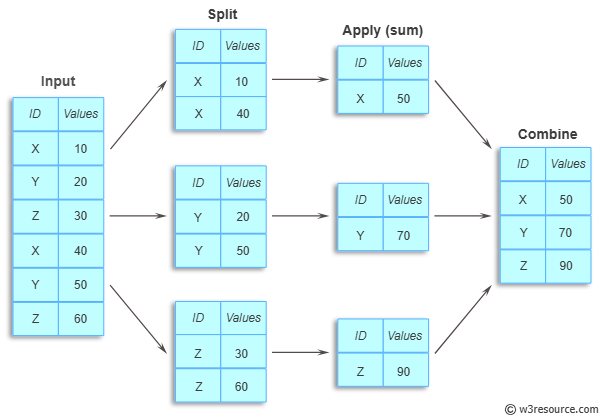

**Sintaxis básica:**
```python
df.groupby('columna').agg({'otra_columna': 'funcion'})
```
- `'columna'`: columna por la que se agrupa.
- `'funcion'`: función de agregación (`sum`, `mean`, `count`, `max`, `min`, `median`, etc.).

**Sintaxis Avanzada**

```python
DataFrame.groupby(by=None, axis=<no_default>, level=None, as_index=True, sort=True, group_keys=True, observed=<no_default>, dropna=True)
```


[Link Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

**Ejemplo**: Supón que tienes un DataFrame con información de estudiantes y sus notas:

In [27]:
# DataFrames para groupby
datos = pd.DataFrame({
    'curso': ['A', 'A', 'B', 'B'],
    'nota': [6.5, 5.8, 7.0, 6.2]
})
datos

,curso,nota
0,A,6.5
1,A,5.8
2,B,7.0
3,B,6.2


In [28]:
promedios = datos.groupby('curso').agg({'nota': 'mean'})
promedios

,nota
curso,
A,6.15
B,6.60


In [29]:
suma_notas = datos.groupby('curso').agg({'nota': 'sum'})
suma_notas

,nota
curso,
A,12.3
B,13.2


**Ejemplo:** GroupBy con múltiples columnas

In [30]:
datos_multi = pd.DataFrame({
    'curso': ['A', 'A', 'B', 'B'],
    'año': [2023, 2023, 2023, 2024],
    'nota': [6.5, 5.8, 7.0, 6.2]
})
datos_multi

,curso,año,nota
0,A,2023,6.5
1,A,2023,5.8
2,B,2023,7.0
3,B,2024,6.2


**Ejemplo**: GroupBy con `aply`

In [31]:
def rango_notas(grupo):
    return grupo['nota'].max() - grupo['nota'].min()

rango_por_curso = datos.groupby('curso').apply(rango_notas)

rango_por_curso



C:\Users\djop4\AppData\Local\Temp\ipykernel_2560\4218831810.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rango_por_curso = datos.groupby('curso').apply(rango_notas)


curso
A    0.7
B    0.8
dtype: float64

In [32]:
# Es necesario el reset_index() porque el resultado de groupby + apply devuelve una Serie con el índice igual al grupo (en este caso 'curso').
# Si queremos convertir esa Serie en un DataFrame y que 'curso' sea una columna normal (no el índice), usamos reset_index().
# Así podemos renombrar las columnas y trabajar con el resultado como un DataFrame estándar.
rango_por_curso_df = rango_por_curso.reset_index() 
rango_por_curso_df.columns = ['curso', 'rango_nota'] # Renombramos las columnas
rango_por_curso_df

,curso,rango_nota
0,A,0.7
1,B,0.8


**Ejemplo solo de `aply`**

In [33]:
def redondear_columna(col):
    return round(col)

notas_redondeadas = datos['nota'].apply(redondear_columna)
notas_redondeadas

0    6
1    6
2    7
3    6
Name: nota, dtype: int64

In [34]:
datos_redondeados = datos.copy()  # Hacemos una copia del DataFrame original
datos_redondeados['nota'] = notas_redondeadas  # Asignamos las notas redondeadas a la columna 'nota'
datos_redondeados

,curso,nota
0,A,6
1,A,6
2,B,7
3,B,6


# 2. Lectura de URLs

In [35]:
import requests
import pandas as pd

In [36]:
url = 'https://imc.uc.cl/' #url del cuál buscamos obtener información
response = requests.get(url) #utilizamos la función '.get()' para obtener una respuesta del sitio, y nos retorna un objeto tipo 'Response'.
text = response.text #el objeto response posee el atributo '.text', el cuál nos entrega en un string el archivo html del sitio
text[0:300]

#NOTA: No siempre la respuesta será el archivo HTML de un sitio, ya que depende de cómo esté configurado.

'<!DOCTYPE html>\n<html class="no-js" lang="es-CL">\n<head>\n    <script>\n    (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\': new Date().getTime(),event:\'gtm.js\'});\n        var f=d.getElementsByTagName(s)[0],\n        j=d.createElement(s),\n        dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';\n        j.async='

In [37]:
url_2 = 'https://api.covidtracking.com/v1/us/daily.json'
response_2 = requests.get(url_2)
text_2 = response_2.text
text_2[0:200]

'[{"date":20210307,"states":56,"positive":28756489,"negative":74582825,"pending":11808,"hospitalizedCurrently":40199,"hospitalizedCumulative":776361,"inIcuCurrently":8134,"inIcuCumulative":45475,"onVen'

**Creamos un Dataframe**

In [38]:
df = pd.read_json(text_2)
df.head()

C:\Users\djop4\AppData\Local\Temp\ipykernel_2560\2209660754.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(text_2)


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


**Normalize**

In [39]:
import pandas as pd

data = [
    {
        "id": 1,
        "name": "Juan",
        "address": {
            "city": "Santiago",
            "zip": "12345",
            "location": {"lat": -33.45, "lon": -70.66}
        }
    },
    {
        "id": 2,
        "name": "Ana",
        "address": {
            "city": "Valparaíso",
            "zip": "54321",
            "location": {"lat": -33.04, "lon": -71.62}
        }
    }
]

In [40]:
df1 = pd.json_normalize(data)
df1

,id,name,address.city,address.zip,address.location.lat,address.location.lon
0,1,Juan,Santiago,12345,-33.45,-70.66
1,2,Ana,Valparaíso,54321,-33.04,-71.62


**Normalizar solo una columna**

In [41]:
import pandas as pd

data = [
    {"id": 1, "name": "Juan", "address": {"city": "Santiago", "zip": "12345"}, "location": {"lat": -33.45, "lon": -70.66}, "job": {"title": "Engineer", "department": "IT"}},
    {"id": 2, "name": "Ana", "address": {"city": "Valparaíso", "zip": "54321"}, "location": {"lat": -33.04, "lon": -71.62}, "job": {"title": "Analyst", "department": "Finance"}}
]
df = pd.DataFrame(data)
df

,id,name,address,location,job
0,1,Juan,"{'city': 'Santiago', 'zip': '12345'}","{'lat': -33.45, 'lon': -70.66}","{'title': 'Engineer', 'department': 'IT'}"
1,2,Ana,"{'city': 'Valparaíso', 'zip': '54321'}","{'lat': -33.04, 'lon': -71.62}","{'title': 'Analyst', 'department': 'Finance'}"


In [42]:
address_df = pd.json_normalize(df['address'])
final_df = pd.concat([df.drop(columns=['address']), address_df], axis=1)
final_df

,id,name,location,job,city,zip
0,1,Juan,"{'lat': -33.45, 'lon': -70.66}","{'title': 'Engineer', 'department': 'IT'}",Santiago,12345
1,2,Ana,"{'lat': -33.04, 'lon': -71.62}","{'title': 'Analyst', 'department': 'Finance'}",Valparaíso,54321
